In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns

In [5]:
def load_data(path):
    # point to the data set directory and choose the file to load
    p = path
    os.chdir(p) 

    #choose a data set
    while True:
        files = []
        with os.scandir(p) as dir:
            for count,entry in enumerate(dir):
                print(f"{count}) {entry.name}")
                files.append(entry.name)




        data = int(input('Enter the file index: '))
        data = os.path.join(p,files[data])
        if not data.endswith('.csv'):
            p = data
            print("\nThis is a directory\n")
        else:
            print(data)
            break
            
    return data

## The dataset
Context
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

Content
* price price in US dollars (\$326--\$18,823)

* carat weight of the diamond (0.2--5.01)

* cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* color diamond colour, from J (worst) to D (best)

* clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* x length in mm (0--10.74)

* y width in mm (0--58.9)

* z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

In [6]:
# create the DataFrame 
p = r'E:\Documents\Data\Datasets'
data = load_data(p)
df = pd.read_csv(data)
df.drop('Unnamed: 0',1,inplace=True)
df.head()

0) ArXiv_old.csv
1) mbti_1.csv
2) news.csv
3) US_Accidents_Dec19.csv
4) cannabis.csv
5) r_dataisbeautiful_posts.csv
6) deepnlp
7) fake-and-real-news-dataset
8) game-of-thrones-srt
9) books.csv
10) graduate-admissions
11) Islander_data.csv
12) mushrooms.csv
13) netflix_titles.csv
14) news-headlines-dataset-for-sarcasm-detection
15) AB_NYC_2019.csv
16) winequality-red.csv
17) StudentsPerformance.csv
18) ted-talks
19) young-people-survey
20) diamonds.csv
21) fake_job_postings.csv
Enter the file index: 20
E:\Documents\Data\Datasets\diamonds.csv


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Count the unique items for each Categorical Feature

In [8]:
# creates a list of only the column names
columns = [column for column in df.columns]
feature = []
# only show for the categorical features and make a list of the categorical/numerical columns
categorical_features = []
numerical_features = []

# loop through each column and count the number of unique items
for column in columns:
    # The number of occurences for each unique value in the column
    # ex. cut: ideal    1322
    #          premium  3267
    #          good(26) 4208
    values = df[column].value_counts()
    # the data type for the column
    feature_type = df[column].dtype
    

    if feature_type == 'object':
        categorical_features.append(column)
        print(f'{values}\n')
    else:
        numerical_features.append(column)

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64



## Visualizations (Cut of the Diamond)

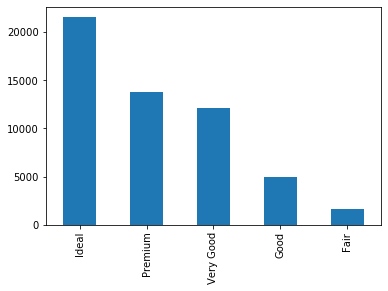

In [21]:
df['cut'].value_counts().plot(kind='bar');

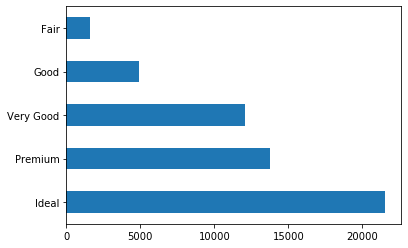

In [22]:
# horizontal bar graph
df['cut'].value_counts().plot(kind='barh');

# Styling the plot

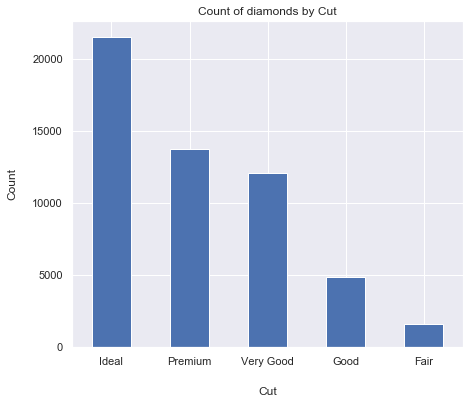

In [38]:
# scales the size of the fonts
sns.set(font_scale=1)
df['cut'].value_counts().plot(kind='bar',figsize=(7,6),rot=0);
#plot sideways
#df['cut'].value_counts().plot(kind='barh',figsize=(7,6),rot=0);

# sets the label for the x and y axis
plt.xlabel('Cut',labelpad=20)
plt.ylabel('Count',labelpad=15)
plt.title("Count of diamonds by Cut");

# Grouping Data
Pandas _.groupby()_ method is used to split the data into groups based on some criteria.
Below you can see it being used to group the data based on the cut of the diamond. When using the groupby method you can apply
a function to the groups and combine them for your output. In this case, each group uses the sum of each feature. So now if you look in the price column the total price for all of the diamonds with a fair cut is $7,017,600. 

The groupby method can be use anytime you want to group parts of your data together.

In [55]:
# group the data by cut where each row is the total for that column at that cut
groupedcuts = df.groupby('cut').sum()

# get the value counts for each cut type a
counts = df['cut'].value_counts()

# add the counts as a new column
groupedcuts['counts'] = counts
groupedcuts

,carat,depth,table,price,x,y,z,counts
cut,,,,,,,,
Fair,1684.28,103107.1,95076.6,7017600,10057.50,9954.07,6412.26,1610
Good,4166.10,305967.0,287955.9,19275009,28645.08,28703.75,17855.42,4906
Ideal,15146.84,1329899.3,1205814.4,74513487,118691.07,118963.24,73304.61,21551
Premium,12300.95,844901.1,810167.4,63221498,82385.88,81985.82,50297.49,13791
Very Good,9742.70,746888.4,700226.2,48107623,69359.09,69713.45,43009.52,12082


In [56]:
# use the reset index method to have the index values be an index location instead of the groupedby value, in this case cut
groupedcuts.reset_index()

,cut,carat,depth,table,price,x,y,z,counts
0,Fair,1684.28,103107.1,95076.6,7017600,10057.50,9954.07,6412.26,1610
1,Good,4166.10,305967.0,287955.9,19275009,28645.08,28703.75,17855.42,4906
2,Ideal,15146.84,1329899.3,1205814.4,74513487,118691.07,118963.24,73304.61,21551
3,Premium,12300.95,844901.1,810167.4,63221498,82385.88,81985.82,50297.49,13791
4,Very Good,9742.70,746888.4,700226.2,48107623,69359.09,69713.45,43009.52,12082


# Bar plots using seaborn
__Basic Bar Plot__:
To draw a bar plot with the Seaborn library, the barplot() function of the seaborn module is used. You need to pass values for the following three parameters of the barplot() function.

* x: Which contains the name of the categorical column.
* y: Which contains the name of the numerical column.
* data: Which stores the name of the dataset.